Домашнее задание. Решение конкурса на kaggle.com


In [247]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

# **Загрузка и обработка данных**

Проведем работу с nan'ами

In [248]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 5.81MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 3.10MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 35.3MB/s]


In [250]:
data = pd.read_csv('./train.csv')

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [251]:
data.sample(5) #пять случайных строк

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
2447,1,94.00,94,Male,1,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
2535,5,96.50,492.55,Male,0,No,No,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,No,Bank transfer (automatic),1
2729,15,20.00,288.05,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,1
4606,38,20.30,749.35,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
2451,31,103.45,3066.45,Male,0,No,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Electronic check,1


In [252]:
data.isna().sum().sum()# количесво nan'ов

0

In [253]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ClientPeriod              5282 non-null   int64  
 1   MonthlySpending           5282 non-null   float64
 2   TotalSpent                5282 non-null   object 
 3   Sex                       5282 non-null   object 
 4   IsSeniorCitizen           5282 non-null   int64  
 5   HasPartner                5282 non-null   object 
 6   HasChild                  5282 non-null   object 
 7   HasPhoneService           5282 non-null   object 
 8   HasMultiplePhoneNumbers   5282 non-null   object 
 9   HasInternetService        5282 non-null   object 
 10  HasOnlineSecurityService  5282 non-null   object 
 11  HasOnlineBackup           5282 non-null   object 
 12  HasDeviceProtection       5282 non-null   object 
 13  HasTechSupportAccess      5282 non-null   object 
 14  HasOnlin

Пропусков нет, но признак TotalSpent не является числовым

In [254]:
data[pd.to_numeric(data['TotalSpent'], errors='coerce').isnull()] # посмотрим на строки где он не числовой

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4002,0,61.90,,Male,0,No,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),0
4326,0,25.35,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
4551,0,52.55,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),0
4598,0,56.05,,Female,0,Yes,Yes,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),0


Есть строки, где значение TotalSpent отсуствует, а так же в них ClientPeriod равен нулю, эти строки неинформативны, их следует удалить из наших данных, и перевести TatalSpent в числовой формат

In [255]:
data = data.replace(' ', np.nan).dropna()
data['TotalSpent'] = data['TotalSpent'].astype('float64')

# **Анализ данных**

In [256]:
data.shape

(5273, 20)

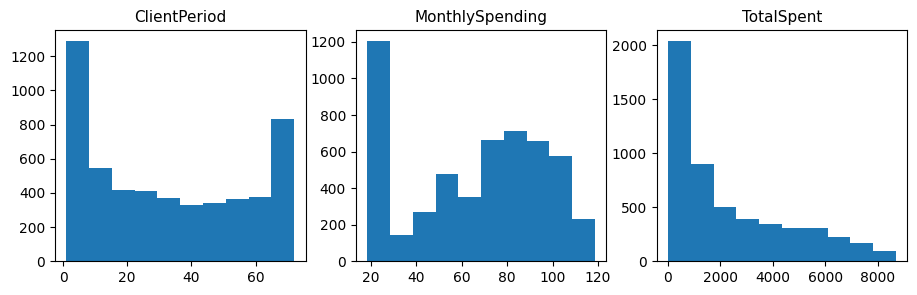

In [257]:
fig, axes = plt.subplots(1, 3, figsize=(11, 3)) # гистограммы численных признаков
for i, col in enumerate(num_cols):
    axes[i].hist(data[col])
    axes[i].set_title(col).set_fontsize(11)

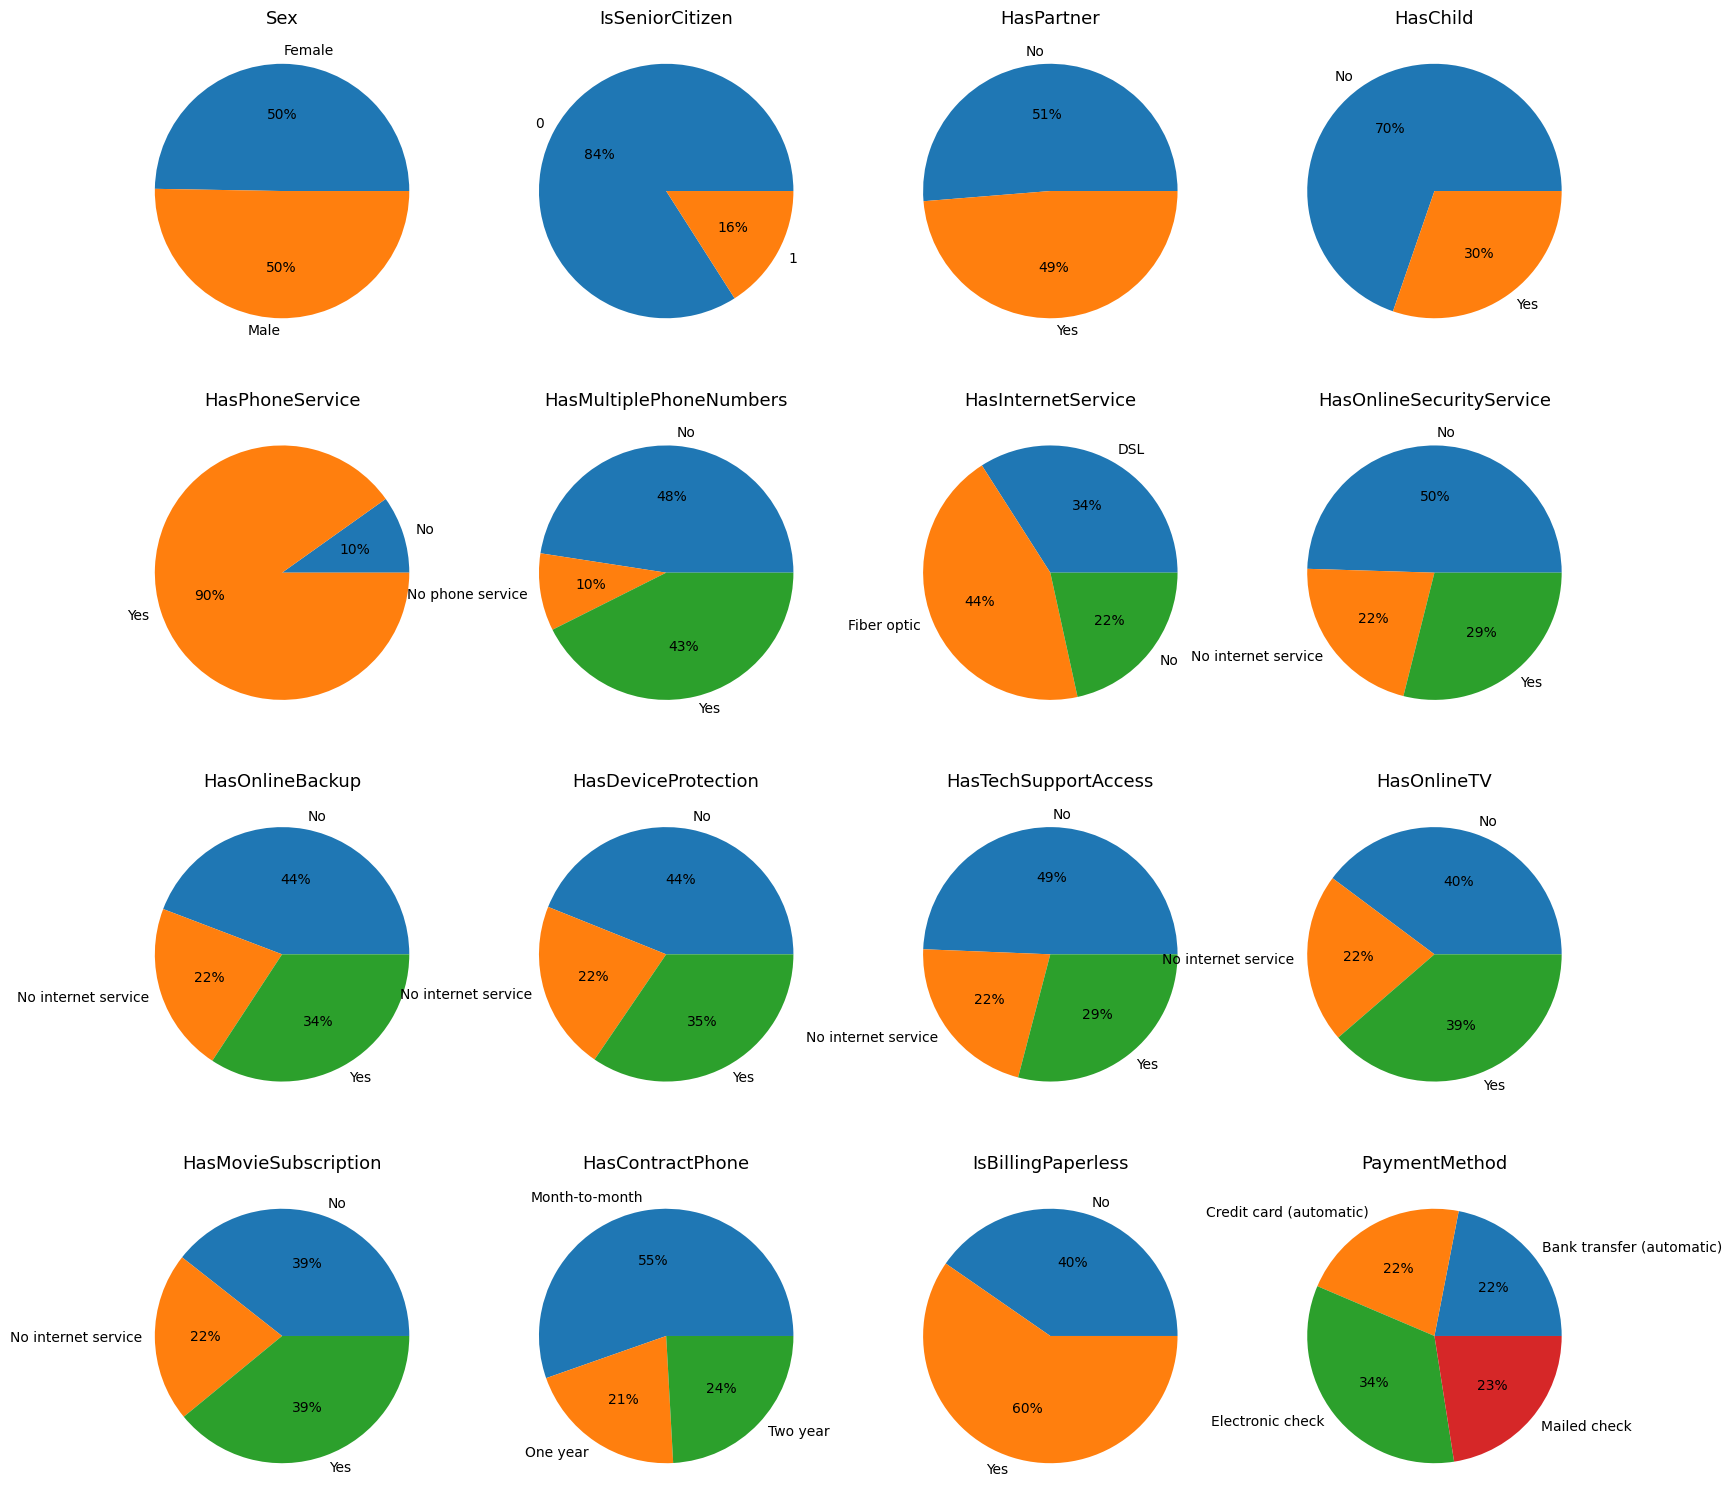

In [258]:
fig, axes = plt.subplots(4, 4, figsize=(19, 19)) # круговые диаграммы категориальных признаков
axes = axes.flatten()
for i, col in enumerate(cat_cols):
    col_values = data.groupby(by=col).size()
    axes[i].pie(x=col_values, autopct='%.0f%%', labels=col_values.index)
    axes[i].set_title(col).set_fontsize(13)

In [259]:
data[target_col].value_counts()

0    3889
1    1384
Name: Churn, dtype: int64

Распределение целевой переменной оказалось несбалансированно, представителей класса 0, более чем в 2.8 раза больше, чем представителей класса 1

# **Применение линейных моделей**

In [260]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score
from sklearn.compose import ColumnTransformer

Используем кроссвалидацию. Соединим преобразования данных и LogisticRegression в один Pipeline с помощью make_pipeline. Затем передадим pipeline в GridSearchCV.

In [261]:
X_train = data.drop(target_col, axis=1)
y_train = data[target_col]

In [262]:
data_new = ColumnTransformer([
    ('num_cols', StandardScaler(), num_cols),
    ('cat_cols', OneHotEncoder(), cat_cols)
    ])  # нормировка столбцов

In [263]:
model = make_pipeline(data_new, LogisticRegression())

In [264]:
param_grid = {
     'logisticregression__C': [100, 10, 1, 0.1, 0.01, 0.001],
     #'logisticregression__penalty': ['l1', 'l2', 'elasticnet'],
     #'logisticregression__max_iter': np.linspace(100, 300, 5)
}

grid_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='roc_auc', refit=True, n_jobs=-1)
grid_model.fit(X_train, y_train);

In [265]:
print(grid_model.best_score_, grid_model.best_params_, sep='\n')

0.8448208909105489
{'logisticregression__C': 100}


# **Градиентный бустинг с CatBoost**

In [266]:
!pip install catboost
import catboost
None

In [267]:
X = data.drop(target_col, axis=1)
y = data[target_col]
X_train1, X_valid, y_train1, y_valid = train_test_split(X, y, train_size=0.8)

In [283]:
catboost_model = catboost.CatBoostClassifier(cat_features=cat_cols, eval_metric='AUC', silent=True, learning_rate=0.005, iterations = 1000)

catboost_model.fit(X_train1, y_train1)

predictions = catboost_model.predict_proba(X_valid)[:, 1]

In [284]:
roc_auc_score(y_valid, predictions)

0.8355249787532794

***Получено качество 0.8355 с lr = 0.005***

# **Предсказания**

In [243]:
best_model = catboost_model

In [245]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] =  best_model.predict_proba(X_test)[:, 1]
#submission.to_csv('./my_submission.csv')
submission.to_csv('submission.csv', index = False)